<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # librería para crear nuestro set de datos
from sklearn.cluster import KMeans  # para ejecutar nuestra clusterización
from sklearn.metrics import silhouette_score  # para validar nuestro coeficiente de silueta, que tan bien está hecho nuestro cluster
from yellowbrick.cluster import SilhouetteVisualizer  # Visualización de cluster

## Preparando datos de prueba

In [12]:
# creamos nuestros datos
# 500 datos y desviación del cluster 0.8, con 4 clusters, solo 2 features para los centroides

x, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

# x tiene las dos dimensiones
# y tiene el cluster al que pertenecen los datos de X
# c tiene los 4 centroides

In [19]:
# Creamos nuestro data frame de data points
df_blobs = pd.DataFrame({
    'x1': x[:,0],
    'x2': x[:,1],
    'y': y
})

In [20]:
# Creamos nuestro data frame de centroides
df_centers = pd.DataFrame({
    'x1': c[:,0],
    'x2': c[:,1]
})

In [14]:
df_blobs

,x1,x2,y
0,-0.948692,-2.961469,1
1,7.074658,6.129025,0
2,-8.336747,-9.478396,3
3,-0.044290,-2.330681,1
4,-7.876101,-9.125859,3
...,...,...,...
495,-1.179592,-1.616946,1
496,7.576425,6.518376,0
497,6.733735,4.806289,0
498,7.482835,7.024823,0


In [21]:
df_centers

,x1,x2
0,6.486793,6.163679
1,-0.720047,-3.295093
2,1.495838,2.083497
3,-7.609543,-9.323538


## Visualización de datos

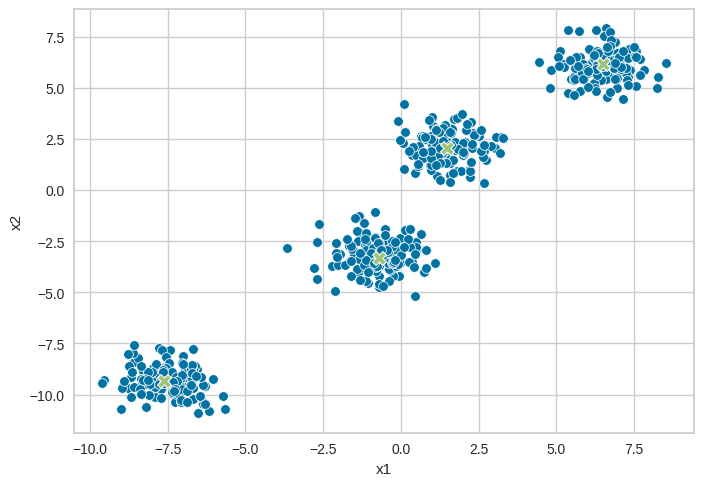

In [23]:
# graficamos los data points, y centroides
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()

## Aplicando K-means

In [27]:
# suponemos que tenemos 3 clusters
kmeans = KMeans(n_clusters=3, n_init='auto')
df_cluster = kmeans.fit_predict(x)
df_blobs['cluster'] = df_cluster  # creamos nueva columna a df_blobs con la predicción de df_cluster
k_means_centers = kmeans.cluster_centers_ # los centroides de la predicción o clusterización que estamos haciendo con KMeans
df_k_means_center = pd.DataFrame({
    'x1': k_means_centers[:,0],
    'x2': k_means_centers[:,1]
})

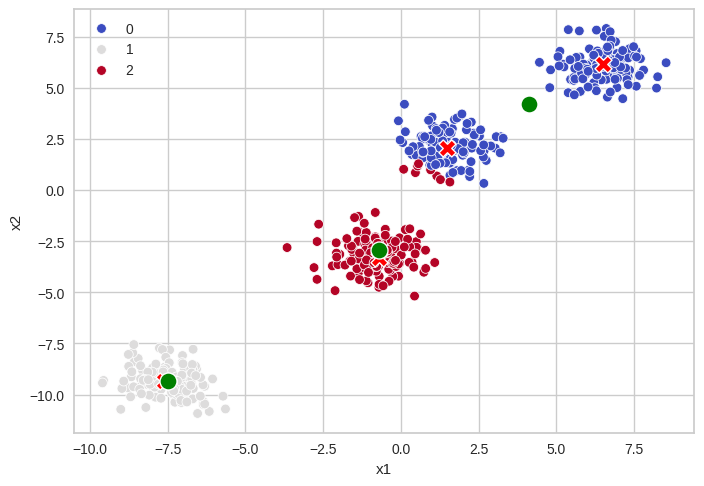

In [30]:
# Graficamos data points anteriores, centroides anteriores y centroides KMeans df_k_means_center de la predicción
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm') # discriminamos por hue='cluster'
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150, color='red') #graficamos centroides anteriores
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='green') # graficamos centroids predichos KMeans
plt.show()

In [31]:
# cambiamos de opinión ponemos que tenemos 4 clusters
kmeans = KMeans(n_clusters=4, n_init='auto')
df_cluster = kmeans.fit_predict(x)
df_blobs['cluster'] = df_cluster  # creamos nueva columna a df_blobs con la predicción de df_cluster
k_means_centers = kmeans.cluster_centers_ # los centroides de la predicción o clusterización que estamos haciendo con KMeans
df_k_means_center = pd.DataFrame({
    'x1': k_means_centers[:,0],
    'x2': k_means_centers[:,1]
})

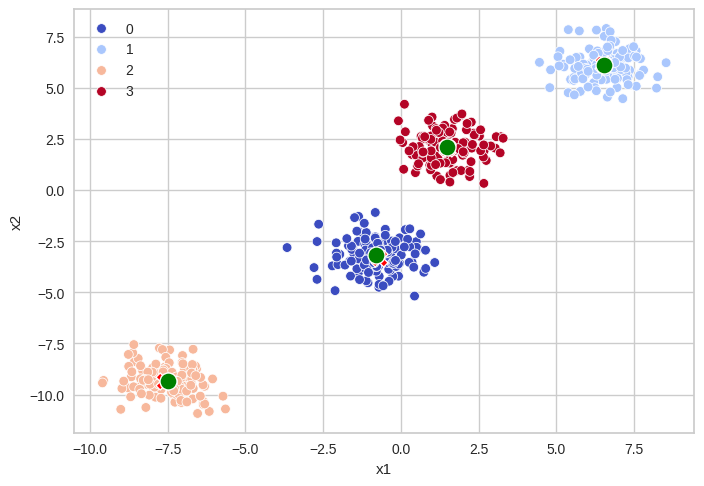

In [32]:
# Graficamos data points anteriores, centroides anteriores y centroides KMeans df_k_means_center de la predicción
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm') # discriminamos por hue='cluster'
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=150, color='red') #graficamos centroides anteriores
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='o', s=150, color='green') # graficamos centroids predichos KMeans
plt.show()

## Encontrando el valor de K

## Evaluando clusters con K-means